In [166]:
%run prepare_data.ipynb
from math import exp
from random import seed
from random import random
import matplotlib.pyplot as plt

In [167]:
training_data = read_csv_int('whilmersdorf01_vornamen_as_features')
test_data = read_csv_int('whilmersdorf01_vornamen_test_data')

print(training_data[0])
print(test_data[0])

[0.0, 0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 1.0]


In [168]:
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [169]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [170]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [171]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [172]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [173]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [174]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [175]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [176]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    costs = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        costs.append(sum_error)
        if epoch % 25==0:
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        plt.plot(costs)

In [180]:
def calculate_precision(data, network):
    correct_count = 0
    for row in data:
        prediction = predict(network, row)
        if prediction == row[-1]:
            correct_count += 1
        #print('Expected=%d, Got=%d' % (row[-1], prediction))
    precision = (correct_count * 100) / len(data)
    #print("precision: {}".format(precision))
    return precision

>epoch=0, lrate=0.007, error=1857.772
>epoch=25, lrate=0.007, error=1073.856
>epoch=50, lrate=0.007, error=1061.406
>epoch=75, lrate=0.007, error=1059.863
>epoch=100, lrate=0.007, error=1059.006
>epoch=125, lrate=0.007, error=1058.315
>epoch=150, lrate=0.007, error=1057.728
>epoch=175, lrate=0.007, error=1057.234
>epoch=200, lrate=0.007, error=1056.827
>epoch=225, lrate=0.007, error=1056.498
Training Data
precision: 75.52083333333333
Test Data
precision: 77.84522003034901


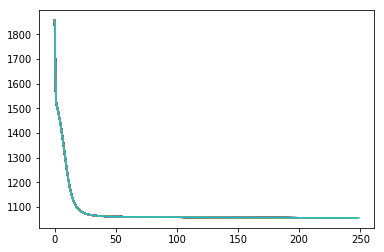

In [178]:
# Test training backprop algorithm
seed(1)
n_inputs = len(training_data[0]) - 1
n_outputs = len(set([row[-1] for row in training_data]))
network = initialize_network(n_inputs, 3, n_outputs)
train_network(network, training_data, 0.007, 250, n_outputs)
print("Training Data")
calculate_precision(training_data, network)
print("Test Data")
calculate_precision(test_data, network)

In [181]:
def convert_name_to_features(name, gender):
    name = name.lower()
    name_features = [
        int(count_vowel_gt_2(name)),
        last_letter_vowel(name),
        int(last_letter_a(name)),
        first_letter_vowel(name),
        gender
    ]
    return name_features

def predict_name(name, gender):
        print("{} ## predicted correct: {}".format(
            name,
            calculate_precision([convert_name_to_features(name, gender)], network) > 99)
        )
#0 = female, 1 = male
predict_name("Sebastian", 0)
predict_name("Gefei", 0)
predict_name("Sophie", 1)
predict_name("Maria", 1)
predict_name("Anne", 1)
predict_name("Anna", 1)
predict_name("Mai", 1)
predict_name("Kai", 0)
predict_name("Jenny", 1)
predict_name("Denny", 0)
predict_name("R2D2", 0)
predict_name("Chewbacca", 0)

Sebastian ## predicted correct: True
Gefei ## predicted correct: False
Sophie ## predicted correct: True
Maria ## predicted correct: True
Anne ## predicted correct: False
Anna ## predicted correct: True
Mai ## predicted correct: False
Kai ## predicted correct: True
Jenny ## predicted correct: False
Denny ## predicted correct: True
R2D2 ## predicted correct: True
Chewbacca ## predicted correct: False
